In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

### Data Preparation

In [21]:
gdp=pd.read_csv("GDP DATA.csv")

foriegn_exhange=pd.read_csv('FER.csv')

inflation_rate=pd.read_csv('Inflation rates data.csv')

purchasing_rate=pd.read_csv('Purchasing power parities.csv')

In [22]:
#selecting countries and year from 1981 to 2016 from Economical Indicators

GDP=gdp.query('LOCATION == "CHN"  or LOCATION == "IND" or LOCATION == "GBR" or LOCATION == "CAN" or LOCATION == "JPN" or LOCATION == "SWE" ' ) 

IFR=inflation_rate.query('LOCATION == "CHN"  or LOCATION == "IND" or LOCATION == "GBR" or LOCATION == "CAN" or LOCATION == "JPN" or LOCATION == "SWE" ' ) 

PR=purchasing_rate.query('LOCATION == "CHN"  or LOCATION == "IND" or LOCATION == "GBR" or LOCATION == "CAN" or LOCATION == "JPN" or LOCATION == "SWE" ' ) 

final_gdp=GDP.query('TIME > 1981 & TIME < 2017')

final_ifr=IFR.query('TIME > "1981" & TIME < "2017"')

final_pr=PR.query('TIME > 1981 & TIME < 2017')

datas = [final_gdp,final_ifr,final_pr]

Economical_data = pd.concat(datas)

Economical_data=Economical_data.reset_index().drop(["index"], axis=1)

Economical_data=Economical_data.drop(columns=['Flag Codes'])

In [23]:
# Selecting countries from FER Data and drpping unnessesary columns from it

A=foriegn_exhange[foriegn_exhange['Country Name'] == 'China']

B=foriegn_exhange[foriegn_exhange['Country Name'] == 'India']

C=foriegn_exhange[foriegn_exhange['Country Name'] == 'United Kingdom']

D=foriegn_exhange[foriegn_exhange['Country Name'] == 'Canada']

E=foriegn_exhange[foriegn_exhange['Country Name'] == 'Switzerland']

F=foriegn_exhange[foriegn_exhange['Country Name'] == 'Japan']

frames = [A,B,C,D,E,F]
final_foriegn_exchange = pd.concat(frames)

final_foriegn_exchange=final_foriegn_exchange.drop(columns=['Country Name','Indicator Name','Indicator Code','1960','1961','1962','1963','1964','1965','1966','1967','1968','1969','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','2017','2018','2019','2020'])

final_foriegn_exchange=final_foriegn_exchange.reset_index().drop(["index"], axis=1)

final_foriegn_exchange['Country Code'][4]='SWE'

In [24]:
# Merging Economical data and FER data with resepecting of its time and country columns


#cleaning time column
for i in range(len(Economical_data)):
    if type(Economical_data['TIME'][i])==str:
        Economical_data['TIME'][i]=int(Economical_data['TIME'][i][0:4])

remove=[]
for i in range(len(Economical_data)):
    if Economical_data['TIME'][i]==1979:
        remove.append(i)
        
Economical_data.drop(Economical_data.index[remove])


# Merging Economical and FER data

time=[]
for i in range(len(Economical_data)):
    for j in range(len(final_foriegn_exchange)):
        if Economical_data['LOCATION'][i]==final_foriegn_exchange['Country Code'][j]:
            Year=str(Economical_data['TIME'][i])
            time.append(final_foriegn_exchange.loc[j,Year])
            
Economical_data['FER']=time

### Data Cleaning

In [25]:
#checking percentage of null values

percent_missing = Economical_data.isnull().sum() * 100 / len(Economical_data)
percent_missing

LOCATION     0.000000
INDICATOR    0.000000
SUBJECT      0.000000
MEASURE      0.000000
FREQUENCY    0.000000
TIME         0.000000
Value        0.000000
FER          9.028976
dtype: float64

In [26]:
#Handling Null Values

Economical_data['FER']=Economical_data['FER'].fillna(Economical_data['FER'].mean())

In [27]:
Economical_data.describe()

,Value,FER
count,2.319200e+04,23192.000000
mean,2.257464e+04,32.176846
std,3.816087e+05,55.630762
min,-2.335896e+01,0.497641
25%,2.300000e+00,1.067040
50%,2.130316e+01,1.485110
75%,8.032076e+01,32.176846
max,1.871210e+07,249.076667


<AxesSubplot:xlabel='FER'>

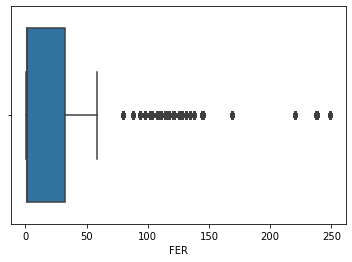

In [28]:
#checking for Outliers

sns.boxplot(Economical_data['FER'])

<AxesSubplot:xlabel='FER'>

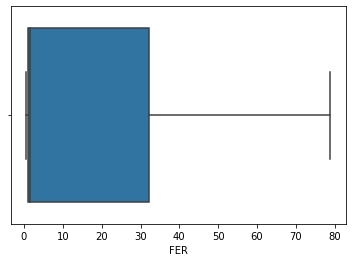

In [29]:
#Removing Outliers

q1 = Economical_data['FER'].quantile(.25)
q3 = Economical_data['FER'].quantile(.75)
IQR = q3 - q1
Economical_data['FER'] = np.clip(Economical_data['FER'], q1 - 1.5 * IQR, q3 + 1.5 * IQR)

sns.boxplot(Economical_data['FER'])

### Exploratory Data Analysis

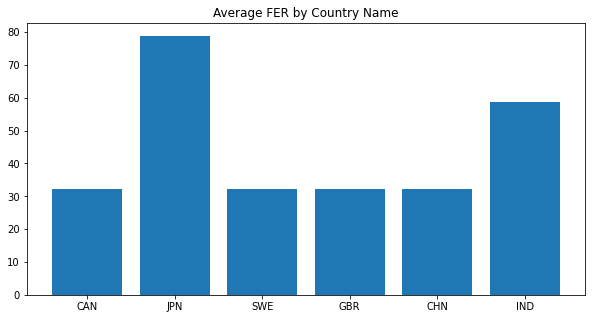

In [30]:
#Average FER by Country Name

plt.figure(figsize=((10,5)))
plt.title("Average FER by Country Name")
country = Economical_data['LOCATION']
FER = Economical_data['FER']
plt.bar(country,FER)
plt.show()

From above graph, we can conclude that Japan Country has highest Exchange Rate.

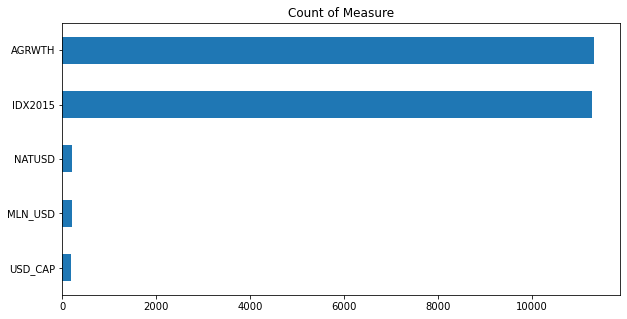

In [31]:
#Plotting Count of Every Measure 

plt.figure(figsize=((10,5)))
plt.title("Count of Measure")
Economical_data['MEASURE'].value_counts().sort_values().plot(kind='barh')
plt.show()

from above plot, we can see AGRWTH and IDX2015 measure has highest value count

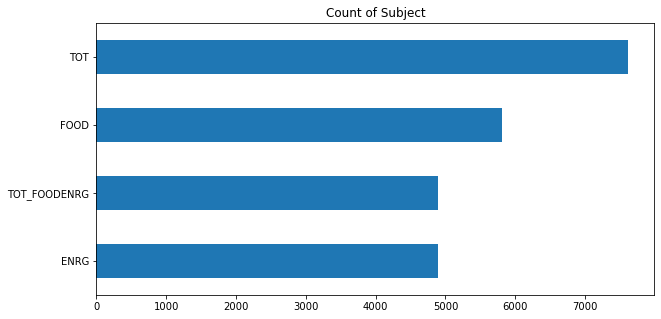

In [32]:
#Plotting Count of Every Subject

plt.figure(figsize=((10,5)))
plt.title("Count of Subject")
Economical_data['SUBJECT'].value_counts().sort_values().plot(kind='barh')
plt.show()

from above plot, we can see TOT and FOOD Subject has highest value count and TOT FOODENRG and ENRG has almost simlar value counts.

<Figure size 720x360 with 0 Axes>

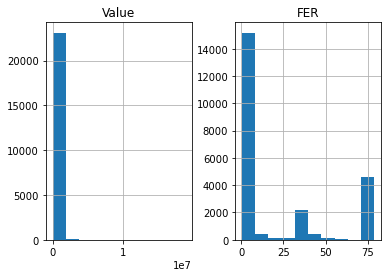

In [33]:
#histogram for numeric data

plt.figure(figsize=((10,5)))
Economical_data.hist()
plt.show()

We can see Numerical Data is not Normally Distributed so we need to normalise the data.

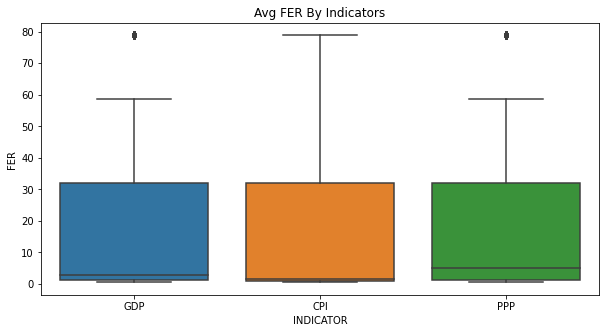

In [34]:

#ploting avg FER With Indicator

plt.figure(figsize=((10,5)))
plt.title("Avg FER By Indicators")
sns.boxplot(x = 'INDICATOR', y = 'FER', data = Economical_data)
plt.show()

from above we can conclude that CPI(Inflation Rate) have highest maximum value and mean and median for CPI is almost equal.

### Feature Engineering

In [35]:
#Checking which categorical Feature is Dependent on FER using Chi-square test

from scipy.stats import chi2_contingency

Cat_name=[]
for i in Economical_data.columns:

    if Economical_data[i].dtypes=='object':
    
        Cat_name.append(i)

        Cat_remove=[]

print("NULL HYPOTHESIS : OUTPUT VARIALBLE IS DEPENDENT OF THE INPUT VARIABLE")

print("ALTERNATIVE HYPOTHESIS : REJECTING THE NULL HYPOTHESIS")

print('-------------------------------------------------------------------')

for i in Cat_name:

    data_crosstab = pd.crosstab(Economical_data[i], Economical_data['FER'],margins = False)

    stat, p, dof, expected = chi2_contingency(data_crosstab)

    alpha = 0.05

    if p <= alpha:

        print('FER is Dependent on '+i+' So we need to keep it on the dataset')

        print('-------------------------------------------------------------------')

    else:

        Cat_remove.append(i)

        print('FER is Independent on '+i+' So we need to remove it from the dataset')

        print('-------------------------------------------------------------------')

NULL HYPOTHESIS : OUTPUT VARIALBLE IS DEPENDENT OF THE INPUT VARIABLE
ALTERNATIVE HYPOTHESIS : REJECTING THE NULL HYPOTHESIS
-------------------------------------------------------------------
FER is Dependent on LOCATION So we need to keep it on the dataset
-------------------------------------------------------------------
FER is Dependent on INDICATOR So we need to keep it on the dataset
-------------------------------------------------------------------
FER is Dependent on SUBJECT So we need to keep it on the dataset
-------------------------------------------------------------------
FER is Dependent on MEASURE So we need to keep it on the dataset
-------------------------------------------------------------------
FER is Independent on FREQUENCY So we need to remove it from the dataset
-------------------------------------------------------------------
FER is Dependent on TIME So we need to keep it on the dataset
-------------------------------------------------------------------


In [16]:
#removing columns which are not dependenet on the FER 

Economical_data=Economical_data.drop(Cat_remove,axis=1)
Economical_data.head(1)

,LOCATION,INDICATOR,SUBJECT,MEASURE,TIME,Value,FER
0,CAN,GDP,TOT,MLN_USD,1982,333889.388,1.233733


### Normalising Numerical Data

In [17]:
#As we know our Numerical data is not normal so we are normalising it here

from sklearn import preprocessing

x =np.array (Economical_data['FER']).reshape(-1,1) 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

Economical_data['FER']=df

x1 =np.array (Economical_data['Value']).reshape(-1,1) 
min_max_scaler1 = preprocessing.MinMaxScaler()
x_scaled1 = min_max_scaler1.fit_transform(x1)
df1 = pd.DataFrame(x_scaled1)

Economical_data['Value']=df1

Economical_data.head(1)

,LOCATION,INDICATOR,SUBJECT,MEASURE,TIME,Value,FER
0,CAN,GDP,TOT,MLN_USD,1982,0.017845,0.009396


### Label Encoding

In [18]:
#Converting Categorical data into Numerical Data using label encoder 

from sklearn import preprocessing
 
label_encoder = preprocessing.LabelEncoder()
 
Economical_data['LOCATION']= label_encoder.fit_transform(Economical_data['LOCATION'])
Economical_data['INDICATOR']= label_encoder.fit_transform(Economical_data['INDICATOR'])
Economical_data['SUBJECT']= label_encoder.fit_transform(Economical_data['SUBJECT'])
Economical_data['MEASURE']= label_encoder.fit_transform(Economical_data['MEASURE'])

In [146]:
Economical_data.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,TIME,Value,FER
0,0,1,2,2,1982,0.017845,0.009396
1,0,1,2,2,1983,0.019026,0.009379
2,0,1,2,2,1984,0.020877,0.010179
3,0,1,2,2,1985,0.022557,0.011077
4,0,1,2,2,1986,0.023505,0.011384


In [19]:
Economical_data.to_csv('Economical_data.csv')